## Alva-Sijie 3D_image_analysis

In [1]:
'''
author: Alvason Zhenhua Li
date:   08/09/2017
'''
### open_package +++
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time
import os
### open_package ---
import IPython.core.display as core
def pd_print(data, width = None, column = None, row = None):
    ## setting the display of pd.DataFrame
    if width is None: width = 100
    if column is None: column = 100
    if row is None: row = 10
    pd.set_option('display.max_colwidth', width)
    pd.set_option('display.max_columns', column)
    pd.set_option('display.max_rows', row)
    pd_table = core.display(pd.DataFrame(data))
    return pd_table
###
### local_package +++
import alva_machinery_toolBox as alva
import alva_machinery_distributionFit as alva_distribution
### local_package ---
AlvaColorCycle = ['blue', 'green', 'cyan'
                  , 'lightpink', 'magenta', 'yellow'
                  , 'purple', 'black', 'deepskyblue'
                  , 'gray', 'red', 'lime']
###############
import datetime
previous_running_time = datetime.datetime.now()
print ('Previous running time is {:}'.format(previous_running_time))

### for saving figure
saving_dir = '/Users/azl/Desktop/AlvaCode/3d_skin_cell/figure'
### an unique name for saving the file
code_name = '_migration3d'
###
total_z_layer = 74

Previous running time is 2017-08-16 11:12:11.880792
Previous running time is 2017-08-16 11:12:11.882890
Previous running time is 2017-08-16 11:12:11.883421


In [2]:
# loading tsv-file
loading_dir = '/Users/azl/Desktop/AlvaData/Sijie/3D_migration'
# file-folder in sample_name
sample_name = np.array(['S1617',
                        'S1617_IFNg',
                        'S1617_K26',
                        'S1617_K26_IFNg',
                       ])
# set sample for loading
sn = 0
loading_dir_path = os.path.join(loading_dir, sample_name[sn])
############## folder for saving figure
saving_dir_path = os.path.join(saving_dir, sample_name[sn])
if os.path.isdir(saving_dir_path) == False:
    os.mkdir(saving_dir_path)
## folder for saving figure
## file_name for saving file
file_name = sample_name[sn] + code_name
#######################################
file_list = os.listdir(loading_dir_path)
### removing the hidden_file so that the file_list is consistent because some folder has no hidden_file +++
for fn in file_list:
    if fn == '.DS_Store':
        file_list.remove(fn)
### removing the hidden_file so that the file_list is consistent because some folder has no hidden_file ---
pd_print(pd.DataFrame(file_list, columns = {'file_list'}))
#######################################

,file_list
0,S1617_noK26_noIFN_PBMC_10X_wh_1.lsm


In [3]:
###########################
section_name = '_raw_image'
###########################
###
watching = alva.TimeWatch()
###
import skimage.external.tifffile as tiff
fn = 0
file_reading = os.path.join(loading_dir_path, file_list[fn])
tif = tiff.TiffFile(file_reading)
#print(tif[0].tags)
pixel_zyx = ['z', 'y', 'x']
raw_micrometer_per_pixel_zyx = np.zeros([len(pixel_zyx)])
for i in range(len(raw_micrometer_per_pixel_zyx)):
    raw_micrometer_per_pixel_zyx[i] = tif[0].cz_lsm_info[12 - i] * 10**6
    print('raw_micrometer_per_pixel_{:} ='.format(pixel_zyx[i]), raw_micrometer_per_pixel_zyx[i])
### getting the data
mm = tif.asarray()
### reorder the color_channel (from Blue_Green_Red [0,1,2] to RGB)
print('raw_mm shape', mm.shape) 
### getting D4(mmm3RGB) from D5
mmm3RB = mm[0]
### moving z  
mmm3RB = np.moveaxis(mmm3RB, 0, 1) 
print('mmm3RB', mmm3RB.shape)
### channel_color_order +++
channel_color_order = ['Red', 'Blue']
### channel_color_order ---
### channel_color_selecting +++
cn = 0
channel_color = channel_color_order[cn]
mmm3X = mmm3RB[cn]
### channel_color_selecting ---
############
# ### plotting
# figure_name = '{:}'.format(section_name)
# file_suffix = '.png'
# save_figure = os.path.join(saving_dir_path, file_name + figure_name + file_suffix)
# AlvaFontSize = 12
# wX = 4
# wY = int(np.ceil(mmm3X.shape[0] / wX))
# figure = plt.figure(figsize = (wX*4, wY*4))
# for wn in range(mmm3X.shape[0]):
#     window = figure.add_subplot(wY, wX, wn + 1)
#     window.set_title('image of {:} (z-layer = {:})'.format(channel_color, wn), fontsize = AlvaFontSize*0.8) 
#     window.imshow(mmm3X[wn], cmap = '{:}s'.format(channel_color), aspect = 'auto')
#     window.set_xlabel('x (pixel)', fontsize = AlvaFontSize*0.8)
#     window.set_ylabel('y (pixel)', fontsize = AlvaFontSize*0.8)
#     window.set_xticklabels(np.int64(window.get_xticks()), fontsize = AlvaFontSize*0.8, rotation = 0) 
#     window.set_yticklabels(np.int64(window.get_yticks()), fontsize = AlvaFontSize*0.8)
# ########
# figure.tight_layout()
# plt.savefig(save_figure, dpi = 64)
# plt.show()
# watching.runTime()
# ##################

raw_micrometer_per_pixel_z = 10.0
raw_micrometer_per_pixel_y = 1.38377639575
raw_micrometer_per_pixel_x = 1.38377639575
raw_mm shape (1, 74, 2, 2966, 2956)
mmm3RB (2, 74, 2966, 2956)


## raw_mmm2D

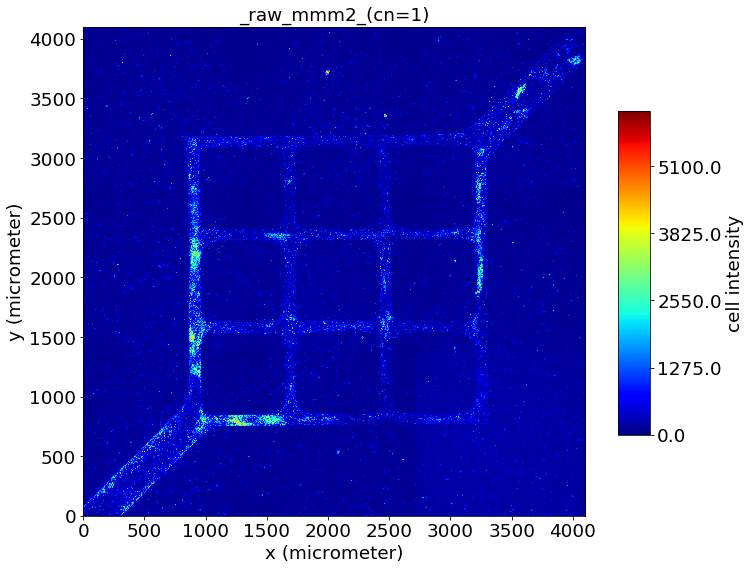

[running time = 3.050717 second]


3.050717353820801

In [4]:
section_name = '_raw_mmm2'
### channel_color_selecting +++
cn = 1
mmm3X = mmm3RB[cn]
### channel_color_selecting ---
mmm2X = np.sum(mmm3X, axis = 0) / mmm3X.shape[0]
### plotting
figure_name = '{:}_(cn={:})'.format(section_name, cn)
file_suffix = '.png'
save_figure = os.path.join(saving_dir_path, file_name + figure_name + file_suffix)
AlvaFontSize = 23
wX = 1
wY = 1
figure = plt.figure(figsize = (wX*9, wY*9))
watching = alva.TimeWatch()
for wn in range(wX*wY):
    window = figure.add_subplot(wY, wX, wn + 1)
    window.set_title(figure_name, fontsize = AlvaFontSize*0.8) 
    wnn = window.imshow(mmm2X, cmap = 'jet', interpolation = 'nearest', aspect = 'auto')
    ### color_bar +++ 
    bar_left = 0.95; bar_bottom = 0.25; bar_width = 0.05; bar_height = 0.5;
    cax_bar = figure.add_axes([bar_left, bar_bottom, bar_width, bar_height])
    cbb = figure.colorbar(wnn,  cax = cax_bar, orientation = 'vertical')
    cbb.set_label('cell intensity', fontsize = AlvaFontSize*0.8)
    cbb_ticklabels = np.asarray([float(item.get_text()) for item in cbb.ax.get_yticklabels()]) * 255
    cbb.ax.set_yticklabels(cbb_ticklabels, fontsize = AlvaFontSize*0.8) 
    ### color_bar ---
    window.set_axis_off()
    window.set_xticks([]) 
    window.set_yticks([])
    window.set_xticklabels([], fontsize = AlvaFontSize*0.8, rotation = 0) 
    window.set_yticklabels([], fontsize = AlvaFontSize*0.8)
    ### 2nd_axis +++
    ### rename_tick +++
    index_i = 1
    pixel_yy = np.arange(0, mmm3X.shape[index_i], 1)
    meter_yy = np.round(pixel_yy * raw_micrometer_per_pixel_zyx[index_i], 1)
    ###
    index_i = 1
    pixel_xx = np.arange(0, mmm3X.shape[index_i], 1)
    meter_xx = np.round(pixel_xx * raw_micrometer_per_pixel_zyx[index_i], 1)
    ### rename_tick ---
    ax2 = figure.add_axes(window.get_position())
    ax2.plot(meter_xx, meter_yy, alpha = 0)
    ax2.set_xlim(meter_xx.min(), meter_xx.max())
    ax2.set_ylim(meter_yy.min(), meter_yy.max())
    ax2.patch.set_visible(False)
    ax2.spines['top'].set_position(('axes', 1))
    ax2.set_xticklabels(np.int64(ax2.get_xticks()), fontsize = AlvaFontSize*0.8, rotation = 0)
    ax2.xaxis.set_ticks_position('bottom')
    ax2.set_xlabel('x (micrometer)', fontsize = AlvaFontSize*0.8)
    ax2.xaxis.set_label_position('bottom')
    ###
    ax2.set_yticklabels(np.int64(ax2.get_yticks()), fontsize = AlvaFontSize*0.8)
    ax2.yaxis.set_ticks_position('left')
    ax2.set_ylabel('y (micrometer)', fontsize = AlvaFontSize*0.8)
    ax2.yaxis.set_label_position('left')
    ### 2nd_axis ---
########
plt.savefig(save_figure, dpi = 128)
plt.show()
watching.runTime()
##################

## local_max

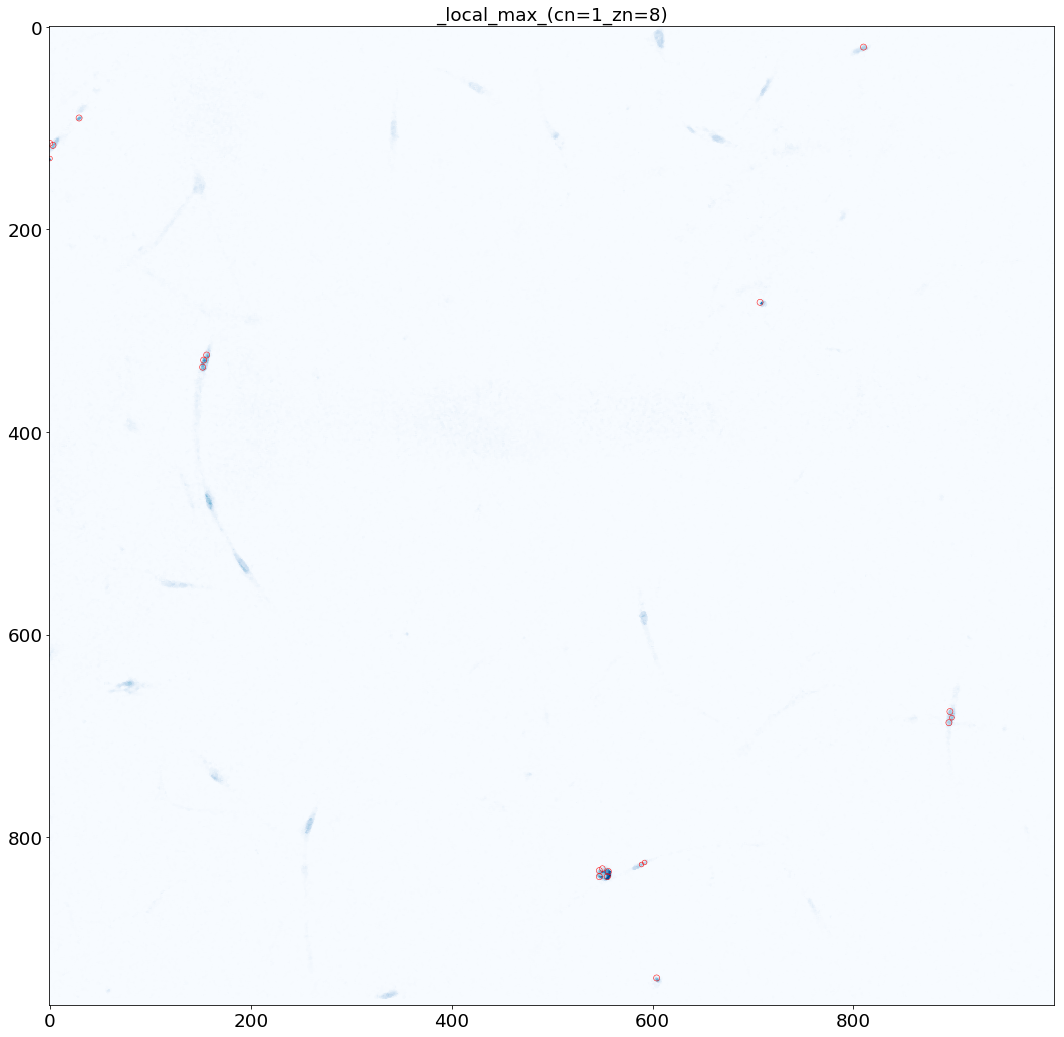

,image_id,channel_cn,layer_zn,pixel_unit_z,pixel_unit_y,pixel_unit_x,local_max_y,local_max_x,deviation_k
0,S1617,1,8,10.0,1.383776,1.383776,939.0,604.0,3.000000
1,S1617,1,8,10.0,1.383776,1.383776,839.0,555.0,3.000000
2,S1617,1,8,10.0,1.383776,1.383776,839.0,547.0,3.000000
3,S1617,1,8,10.0,1.383776,1.383776,834.0,556.0,3.000000
4,S1617,1,8,10.0,1.383776,1.383776,833.0,547.0,3.000000
...,...,...,...,...,...,...,...,...,...
15,S1617,1,8,10.0,1.383776,1.383776,130.0,0.0,2.333333
16,S1617,1,8,10.0,1.383776,1.383776,117.0,3.0,3.000000
17,S1617,1,8,10.0,1.383776,1.383776,115.0,0.0,2.777778
18,S1617,1,8,10.0,1.383776,1.383776,90.0,29.0,3.000000


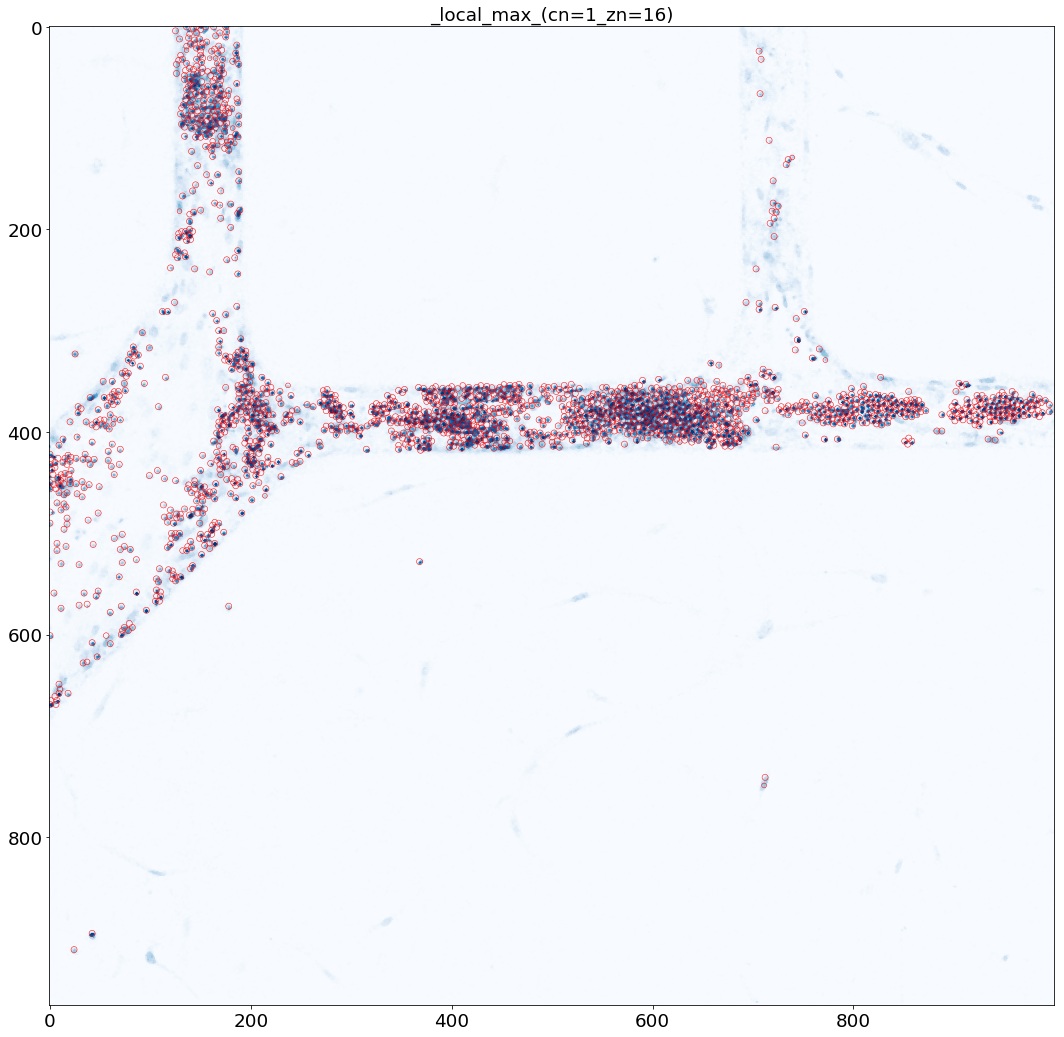

,image_id,channel_cn,layer_zn,pixel_unit_z,pixel_unit_y,pixel_unit_x,local_max_y,local_max_x,deviation_k
0,S1617,1,16,10.0,1.383776,1.383776,911.0,24.0,3.000000
1,S1617,1,16,10.0,1.383776,1.383776,895.0,42.0,3.000000
2,S1617,1,16,10.0,1.383776,1.383776,749.0,711.0,2.333333
3,S1617,1,16,10.0,1.383776,1.383776,741.0,712.0,3.000000
4,S1617,1,16,10.0,1.383776,1.383776,669.0,6.0,3.000000
...,...,...,...,...,...,...,...,...,...
1767,S1617,1,16,10.0,1.383776,1.383776,0.0,175.0,3.000000
1768,S1617,1,16,10.0,1.383776,1.383776,0.0,163.0,3.000000
1769,S1617,1,16,10.0,1.383776,1.383776,0.0,155.0,3.000000
1770,S1617,1,16,10.0,1.383776,1.383776,0.0,146.0,2.777778


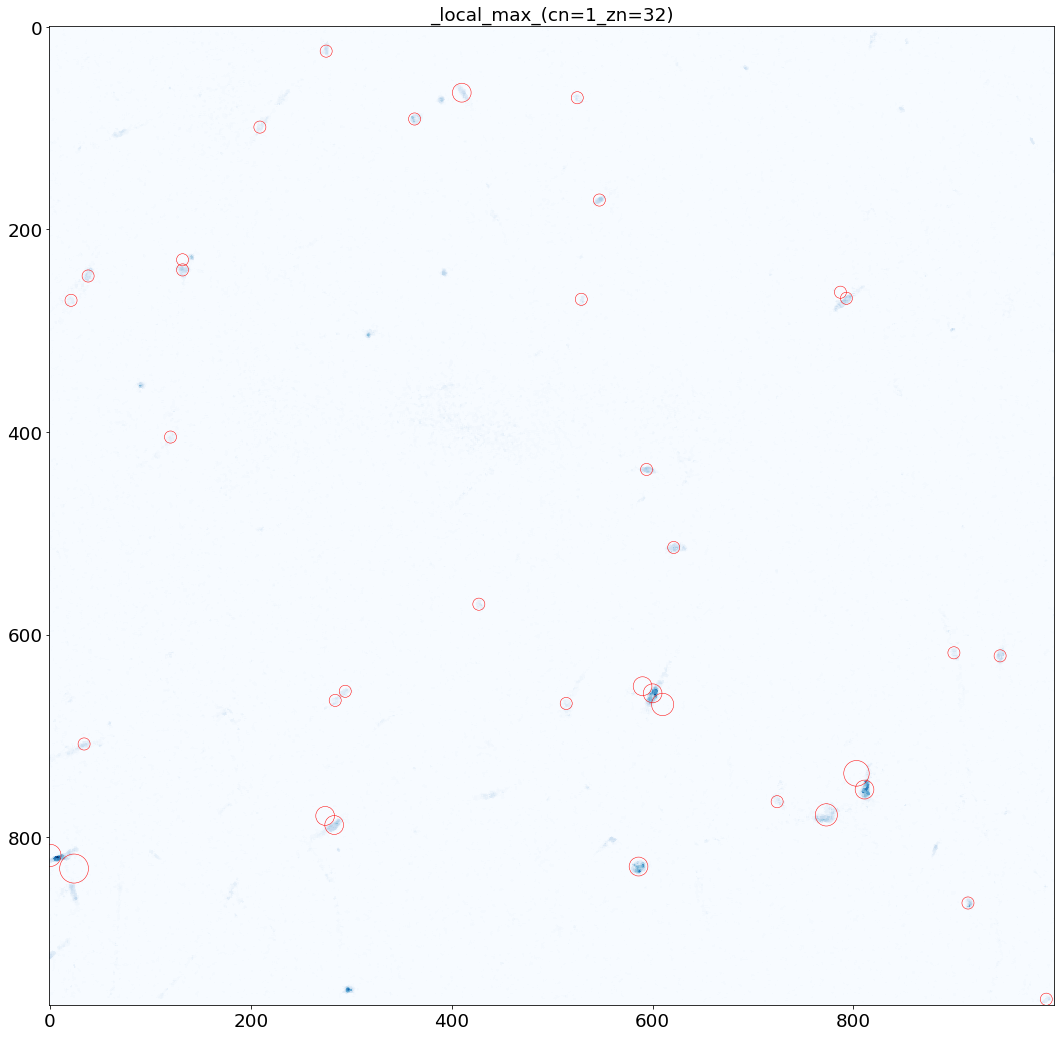

,image_id,channel_cn,layer_zn,pixel_unit_z,pixel_unit_y,pixel_unit_x,local_max_y,local_max_x,deviation_k
0,S1617,1,32,10.0,1.383776,1.383776,960.0,992.0,6.000000
1,S1617,1,32,10.0,1.383776,1.383776,865.0,914.0,6.000000
2,S1617,1,32,10.0,1.383776,1.383776,831.0,24.0,14.333333
3,S1617,1,32,10.0,1.383776,1.383776,829.0,586.0,9.333333
4,S1617,1,32,10.0,1.383776,1.383776,818.0,0.0,11.000000
...,...,...,...,...,...,...,...,...,...
32,S1617,1,32,10.0,1.383776,1.383776,99.0,209.0,6.000000
33,S1617,1,32,10.0,1.383776,1.383776,91.0,363.0,6.000000
34,S1617,1,32,10.0,1.383776,1.383776,70.0,525.0,6.000000
35,S1617,1,32,10.0,1.383776,1.383776,65.0,410.0,9.333333


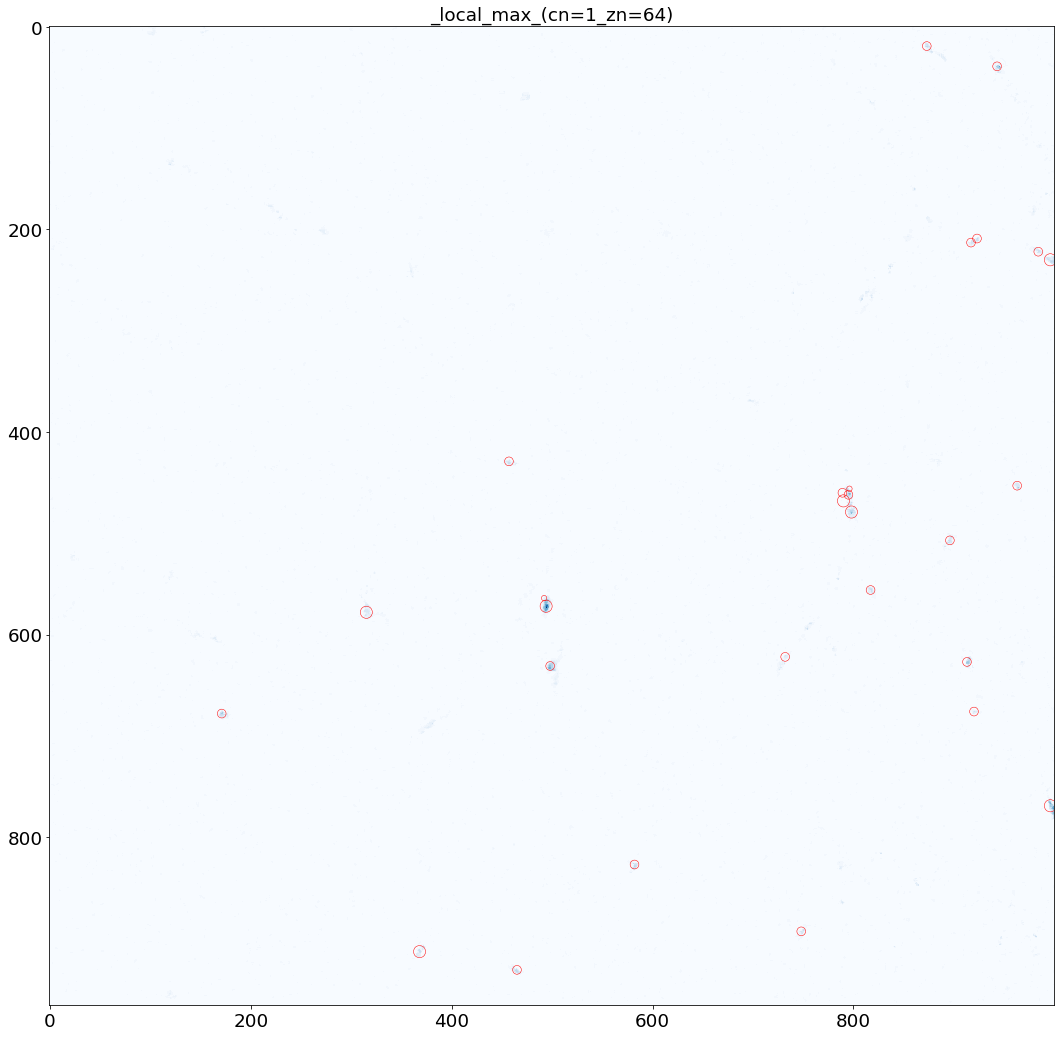

,image_id,channel_cn,layer_zn,pixel_unit_z,pixel_unit_y,pixel_unit_x,local_max_y,local_max_x,deviation_k
0,S1617,1,64,10.0,1.383776,1.383776,931.0,465.0,4.333333
1,S1617,1,64,10.0,1.383776,1.383776,913.0,368.0,6.000000
2,S1617,1,64,10.0,1.383776,1.383776,893.0,748.0,4.333333
3,S1617,1,64,10.0,1.383776,1.383776,827.0,582.0,4.333333
4,S1617,1,64,10.0,1.383776,1.383776,769.0,996.0,6.000000
...,...,...,...,...,...,...,...,...,...
23,S1617,1,64,10.0,1.383776,1.383776,222.0,984.0,4.333333
24,S1617,1,64,10.0,1.383776,1.383776,213.0,917.0,4.333333
25,S1617,1,64,10.0,1.383776,1.383776,209.0,923.0,4.333333
26,S1617,1,64,10.0,1.383776,1.383776,39.0,943.0,4.333333


[running time = 75.479023 second]


75.47902297973633

In [5]:
watching = alva.TimeWatch()
### channel_layer_selecting +++
cn = 1
mmm3X = mmm3RB[cn]
for zn in [8, 16, 32, 64]:#range(mmm3X.shape[0])
    mmm = mmm3X[zn][2000:3000, 500:1500]
    ### channel_layer_selecting ---
    from skimage import exposure
    if exposure.is_low_contrast(mmm) == True:
        ###
        from skimage import filters
        mmm = filters.median(mmm)
        mmm = (mmm - mmm.min()) / (mmm.max() - mmm.min())
        ###
        from skimage.feature import blob_doh as local_max
        galaxy = local_max(mmm, max_sigma = 16, threshold = 0.0002)  
        select_star_radius = galaxy[:, 2].mean() 
        galaxy = galaxy[galaxy[:, 2] > select_star_radius]
        ### 
    else:
        ###
        from skimage import filters
        mmm = filters.median(mmm)
        mmm = (mmm - mmm.min()) / (mmm.max() - mmm.min())
        ###
        from skimage.feature import blob_doh as local_max
        galaxy = local_max(mmm, max_sigma = 3, threshold = 0.002)    
        ###
    ###
    section_name = '_local_max'
    ### plotting
    figure_name = '{:}_(cn={:}_zn={:})'.format(section_name, cn, zn)
    file_suffix = '.png'
    save_figure = os.path.join(saving_dir_path, file_name + figure_name + file_suffix)
    AlvaFontSize = 23
    wX = 1
    wY = 1
    figure = plt.figure(figsize = (wX*18, wY*18))
    for wn in range(wX*wY):
        if wn == 0:
            ###
            window = figure.add_subplot(wY, wX, wn + 1)
            window.set_title(figure_name, fontsize = AlvaFontSize*0.8)
            window.imshow(mmm, cmap = channel_color_order[cn] + 's', interpolation = 'nearest', aspect = 'auto')
            ###
            for star in galaxy:
                y, x, r = star
                c = plt.Circle((x, y), r, color = 'red', linewidth = 0.5, fill = False)
                window.add_patch(c)
            ###
            window.set_xticklabels(np.int64(window.get_xticks()), fontsize = AlvaFontSize*0.8, rotation = 0) 
            window.set_yticklabels(np.int64(window.get_yticks()), fontsize = AlvaFontSize*0.8)
    ########
    plt.savefig(save_figure, dpi = 128)
    plt.show()
    ##################
    #######################################################
    ### figure_table
    #######################################################
    figure_table = pd.DataFrame({'local_max_y': galaxy[:, 0],
                                 'local_max_x': galaxy[:, 1],
                                 'deviation_k': galaxy[:, 2]})
    ###
    figure_table['image_id'] = figure_table.apply(lambda row: sample_name[sn], axis = 1)
    figure_table['channel_cn'] = figure_table.apply(lambda row: cn, axis = 1)
    figure_table['layer_zn'] = figure_table.apply(lambda row: zn, axis = 1)
    figure_table['pixel_unit_z'] = figure_table.apply(lambda row: raw_micrometer_per_pixel_zyx[0], axis = 1)
    figure_table['pixel_unit_y'] = figure_table.apply(lambda row: raw_micrometer_per_pixel_zyx[1], axis = 1)
    figure_table['pixel_unit_x'] = figure_table.apply(lambda row: raw_micrometer_per_pixel_zyx[2], axis = 1)
    column_name = ['image_id', 'channel_cn', 'layer_zn',
                   'pixel_unit_z', 'pixel_unit_y', 'pixel_unit_x',
                   'local_max_y',
                   'local_max_x',
                   'deviation_k']
    ### ordering the table by column_name
    figure_table = figure_table[column_name]
    ############################
    table_name = '_galaxy_{:}'.format(figure_name)
    file_suffix = '.csv'
    save_csv = os.path.join(saving_dir_path, file_name + table_name + file_suffix)
    figure_table.to_csv(save_csv, index = False)
    ############################
    rrr = pd.read_csv(save_csv)
    pd_print(rrr)
    ############################
watching.runTime()

## probe_window (loading figure_table)

,image_id,channel_cn,layer_zn,pixel_unit_z,pixel_unit_y,pixel_unit_x,local_max_y,local_max_x,deviation_k
0,S1617,1,16,10.0,1.383776,1.383776,911.0,24.0,3.000000
1,S1617,1,16,10.0,1.383776,1.383776,895.0,42.0,3.000000
2,S1617,1,16,10.0,1.383776,1.383776,749.0,711.0,2.333333
3,S1617,1,16,10.0,1.383776,1.383776,741.0,712.0,3.000000
4,S1617,1,16,10.0,1.383776,1.383776,669.0,6.0,3.000000
...,...,...,...,...,...,...,...,...,...
1767,S1617,1,16,10.0,1.383776,1.383776,0.0,175.0,3.000000
1768,S1617,1,16,10.0,1.383776,1.383776,0.0,163.0,3.000000
1769,S1617,1,16,10.0,1.383776,1.383776,0.0,155.0,3.000000
1770,S1617,1,16,10.0,1.383776,1.383776,0.0,146.0,2.777778


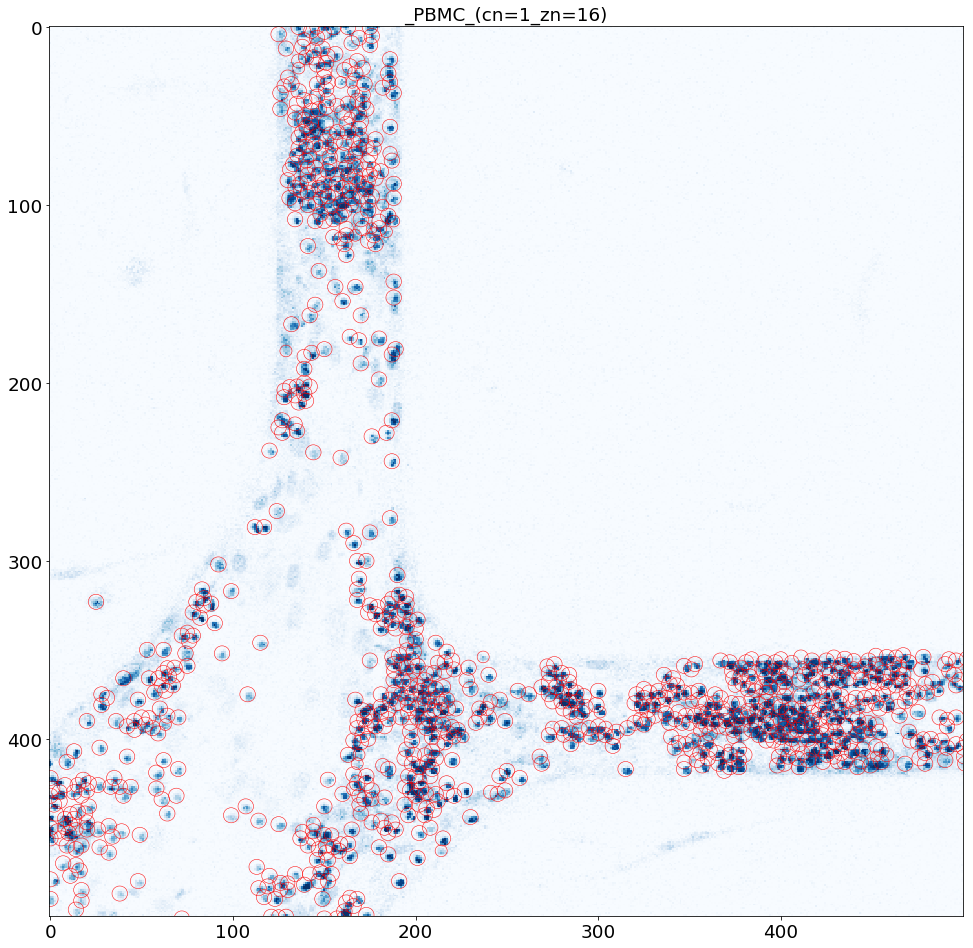

[running time = 9.197495 second]


9.197494983673096

In [6]:
############################
### reading_figure_table +++
cn = 1
zn = 16
section_name = '_local_max'
figure_name = '{:}_(cn={:}_zn={:})'.format(section_name, cn, zn)
table_name = '_galaxy_{:}'.format(figure_name)
file_suffix = '.csv'
read_csv = os.path.join(saving_dir_path, file_name + table_name + file_suffix)
rrr = pd.read_csv(read_csv)
pd_print(rrr)
#############
yy = rrr['local_max_y'].values
xx = rrr['local_max_x'].values
rr = 2**(0.5) * rrr['deviation_k'].values
galaxy_PBMC = np.array([yy, xx, rr]).T
### reading_figure_table ---
############################
### channel_layer_selecting +++
cn = 1
mmm3X = mmm3RB[cn]
zn = 16
mmm = mmm3X[zn][2000:2500, 500:1000]
### channel_layer_selecting ---
section_name = '_PBMC'
###
### plotting
figure_name = '{:}_(cn={:}_zn={:})'.format(section_name, cn, zn)
### plotting
file_suffix = '.png'
save_figure = os.path.join(saving_dir_path, file_name + figure_name + file_suffix)
AlvaFontSize = 23
wX = 2
wY = 2
figure = plt.figure(figsize = (wX*18, wY*18))
watching = alva.TimeWatch()
for wn in range(wX*wY):
    if wn == 0:
        ###
        window = figure.add_subplot(wY, wX, wn + 1)
        window.set_title(figure_name, fontsize = AlvaFontSize*0.8)
        window.imshow(mmm, cmap = channel_color_order[cn] + 's', interpolation = 'nearest', aspect = 'auto')
        ###
        for star in galaxy_PBMC:
            y, x, r = star
            c = plt.Circle((x, y), r, color = 'red', linewidth = 0.5, fill = False)
            window.add_patch(c)
        ###
        window.set_xticklabels(np.int64(window.get_xticks()), fontsize = AlvaFontSize*0.8, rotation = 0) 
        window.set_yticklabels(np.int64(window.get_yticks()), fontsize = AlvaFontSize*0.8)
########
plt.savefig(save_figure, dpi = 128)
plt.show()
watching.runTime()